### Compare a transect from the filament with those crossing mesoscale eddy, and upwelling region

In [1]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import urllib.request
import xarray as xr
import pandas as pd
import glob
import os
#from datetime import datetime
import datetime as dt
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from oceans.datasets import etopo_subset
from oceans.sw_extras import gamma_GP_from_SP_pt
from matplotlib.patches import Polygon
import gsw
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.io
#import pixiedust # for pixie_debugger
import pycwt as wavelet
from pyspec import helmholtz as helm
from pyspec import spectrum as spec    
from itertools import islice # for slice OrderedDict

os.chdir("/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files") # need to set working directory to get the next step to work
from Benguela.src.met132_ctd_ladcp_functions import load_combine_ladcp_ctd_data #import load_ctd_data
from Benguela.src.met132_scanfish_sadcp_functions import load_combine_sadcp_scanfish_data #import load_ctd_data
import Benguela.src.met132_calc_functions as cf
import Benguela.src.met132_plotting_functions as fg
import Benguela.src.met132_sea_level_functions as sl
import Denmark_Strait.src.spectra_and_wavelet_functions as sw
import Denmark_Strait.src.ssa_core as ssa

# some colors (prettier than default boring colors)
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

============================================================================================================================

#### Load the data

In [2]:
# ====== load SADCP and Scanfish data
sadcp_nc_dir = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/'

def read_in_scan_sadcp(transect_name):
    # actually just sadcp data, but putting them in same Dict
    scan_sadcp_transects_1km[transect_name] = xr.open_dataset((sadcp_nc_dir+'scan_sadcp_transects_1km_'+transect_name+'.nc')) 
    scan_sadcp_transects_1km[transect_name] = scan_sadcp_transects_1km[transect_name].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
    return scan_sadcp_transects_1km
def read_in_sadcp(transect_name):
    # actually just sadcp data, but putting them in same Dict
    scan_sadcp_transects_1km[transect_name] = xr.open_dataset((sadcp_nc_dir+'sadcp_transects_1km_'+transect_name+'.nc')) 
    scan_sadcp_transects_1km[transect_name] = scan_sadcp_transects_1km[transect_name].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
    return scan_sadcp_transects_1km
def read_in_ctdladcp(transect_name):
    ctd_ladcp_transects_1km[transect_name] = xr.open_dataset((sadcp_nc_dir+'ctd_ladcp_transects_'+transect_name+'.nc')) 
    ctd_ladcp_transects_1km[transect_name] = ctd_ladcp_transects_1km[transect_name].set_index(xy=['x_m','x_km','lat','lon','time','station'])
    return ctd_ladcp_transects_1km

scan_sadcp_transects_1km = OrderedDict() # Preallocate output dictionary
ctd_ladcp_transects_1km = OrderedDict() # Preallocate output dictionary
scan_sadcp_transects_1km = read_in_scan_sadcp('ScanTransect2')
scan_sadcp_transects_1km = read_in_sadcp('AcrossUpwelling1')
scan_sadcp_transects_1km = read_in_sadcp('AwayFromFilament1')
scan_sadcp_transects_1km = read_in_sadcp('ToCapetown1')

filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016323.L3m_DAY_SST_sst_4km.nc"
sst_map_18 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016324.L3m_DAY_SST_sst_4km.nc"
sst_map_19 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016329.L3m_DAY_SST_sst_4km.nc"
sst_map_24 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016334.L3m_DAY_SST_sst_4km.nc"
sst_map_29 = xr.open_dataset(filenames) # lat,lon,sst
filenames = "/Volumes/Backup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016342.L3m_DAY_SST_sst_4km.nc"
sst_map_1207 = xr.open_dataset(filenames) # lat,lon,sst

# ====== load SSH map
nc_dir = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/'
gos_map = xr.open_dataset(nc_dir+'sla_gos.nc')


============================================================================================================================

#### Some Processing

##### Horizontal kinetic energy spectra

In [3]:
for key in scan_sadcp_transects_1km:
    scan_sadcp_transects_1km[key] = cf.calc_KE(scan_sadcp_transects_1km[key])    

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


============================================================================================================================

#### KE spectra of various transects

550000 500000


(0, 0.00012)

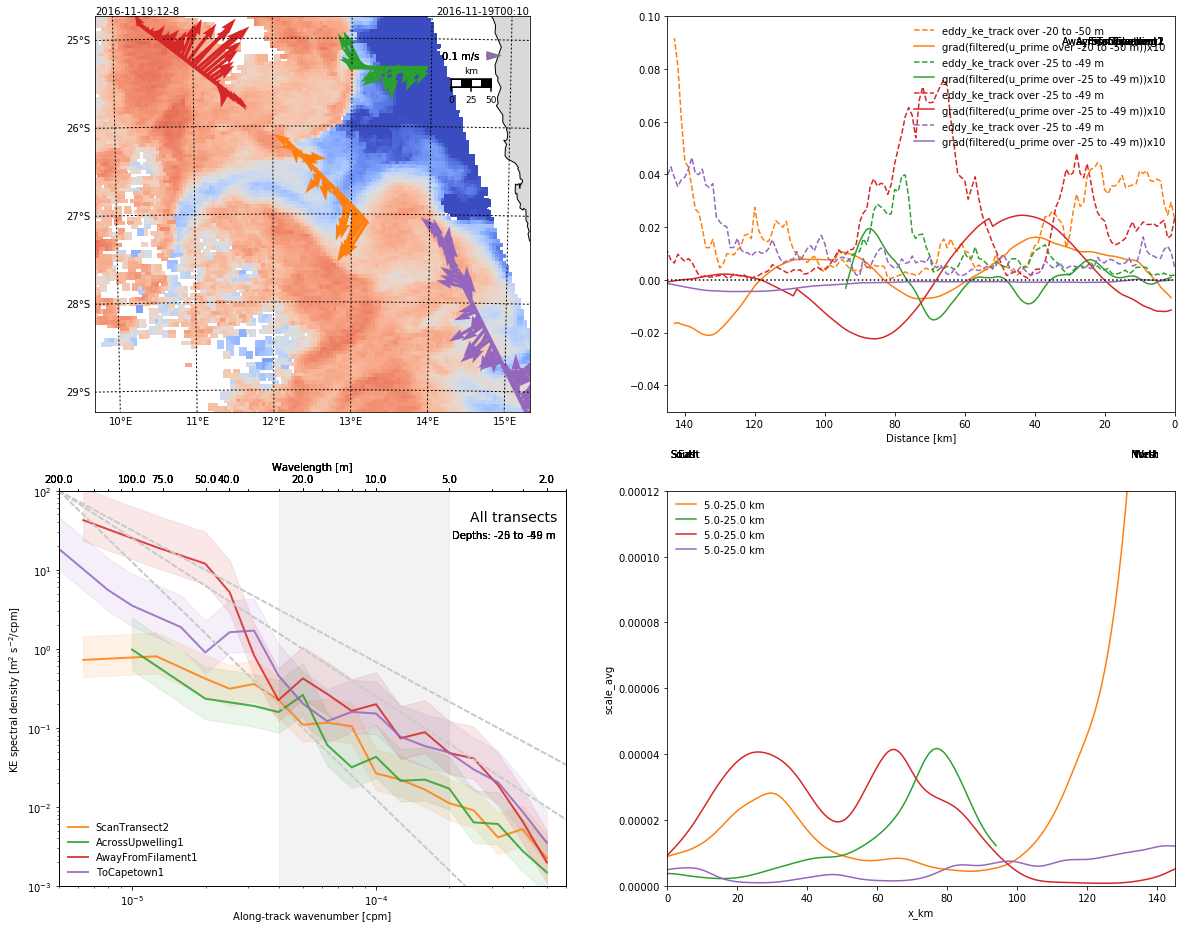

In [4]:
depth_range= slice(-19,-50)
nbins_spec_av=10 # i.e. binned such that nbins_spec_av points are plotted for each order of magnitude (decade)
spec_variables = list(('eddy_ke_track',''))#,'ke_b'))

# where do the spectral slopes change?
k_slope_change = np.array((1e-5,4e-5, 2e-4,5e-4))
l_slope_change = 1e-3/k_slope_change[-1::-1]
front_locations = np.array([[5,15,55,65],[35,45,130,140],[28,38,65,75],[0,10,50,60]])

nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*10.,nrows*8))
axs = axs.ravel()

# overview map of transects used in comparison
fg.plot_map_view(sadcp=None, scan_sadcp = scan_sadcp_transects_1km, topo=None,
                 sst_map=sst_map_19, sst_map1=None, x_lim=[0,150],axs=[axs[0],550000,500000,12.5,-27])

# line plots of KE and du/dtrack
si = 1
y_lim = [-0.05,0.1]
x_lim = [0,145]
sik,sik2 = 0.1,0
for key in scan_sadcp_transects_1km:
    if sik > 0.4: continue
    axs[si] = fg.plot_line_at_one_depth(scan_sadcp_transects_1km[key], 'eddy_ke_track', z_value=depth_range, Gradient=False, Filter=False,
                              ax=axs[si], lcolor=plt.cm.tab20(sik), llinestyle='--',x_lim=x_lim, y_lim=y_lim, last_row_flag=True)
    axs[si] = fg.plot_line_at_one_depth(scan_sadcp_transects_1km[key], 'u_prime', z_value=depth_range, Gradient=True, Filter=True,Factor=2,
                              ax=axs[si], lcolor=plt.cm.tab20(sik), x_lim=x_lim, y_lim=y_lim, last_row_flag=True)
    sik,sik2 = sik + 0.1, sik2 +1
lg = axs[si].legend(loc=0,frameon=False)
axs[si].axhline(y=0,color='k',linestyle=':')

# Plot spectra of KE
si = 2
sik = 0.1
for key in scan_sadcp_transects_1km:
    axs[si] = fg.plot_spec_pyspec(scan_sadcp_transects_1km,key,depth_range= depth_range,nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,
                                  ax=axs[si],left_flag=True,xlim_in=[5e-6,6e-4],ylim_in=[1e-3,1e2],line_color_start=sik)
    sik = sik + 0.1
lg = axs[si].legend(loc=0,frameon=False)
axs[si].text(1,0.95,'All transects  ',transform=axs[si].transAxes,horizontalalignment='right',verticalalignment='top',fontsize=14)
#axs[si].set_ylim(1e-3,1e2)
axs[si].axvspan(k_slope_change[1],k_slope_change[2], alpha=0.05, color='k')

# Plot scale-averaged wavelet spectra
si = si+1
#col_ind = np.arange(0.1,1,0.1) # to match fg.plot_spec_pyspec
sik,sik2 = 0.1,0
wave_out = OrderedDict() # Preallocate output dictionary
for key in scan_sadcp_transects_1km:
    if sik > 0.4: continue
    data_in = scan_sadcp_transects_1km[key][spec_variables[0]].reset_index('xy').swap_dims({'xy': 'x_km'}).sel(z=depth_range).mean(dim='z')
    wave_out[key] = sw.run_wavelet(data_in, avg1=l_slope_change[1:3], gws_range=None, time_name = 'x_km', period_name = 'wavelength')
    axs[si] = sw.waveplt_ScaleAverage(wave_out[key],scale_range = l_slope_change[1:3],ax=axs[si],time_name='x_km',
                                      llabel=(str(l_slope_change[1])+'-'+str(l_slope_change[2])+' km'),lcolor=plt.cm.tab20(sik))
    sik,sik2 = sik + 0.1, sik2 +1
lg = axs[si].legend(loc=0,frameon=False)
axs[si].set_xlim(x_lim)
axs[si].set_ylim((0,1.2e-4))


#### Figure caption: Top left panel: map showing transects (and their ADCP velocities) used in the other plots. Bottom left: Depth-averaged (20-50 m) kinetic energy spectra for the six transects. The dashed lines show slopes of -5/3, -2, and -3. The grey vertical shading shows a region of similar spectral slope. Top right: line plots of depth-averaged (20-50 m) kinetic energy (dashed lines) and u-velocity gradient (solid line). The u gradient is used to identify fronts, i.e. where the gradient is at a max or min. These are shown as vertical shading. Bottom right: Wavelet power for 5-25 km wavelengths (based on grey area in lower left plot), for depth-averaged (20-50 m) kinetic energy. Used to identify where in the filament the energy at these scales is coming from.

#### Spectra Notes:
#####  - the mesoscale seems to show up very well in "AwayFromFilament1", and not in the other transects
#####  - for scales 4-30 km, slopes are comparable across all transects; maybe steeper for filament, or the filament transects get to 5/3 or 2 at slightly smaller scales
#### Wavelet Notes:
##### - from map, a strong qualitative corellation between sharper thermal fronts (tighter contour lines) and larger contribution to wavelet spectra (big marker size, yellow colour)


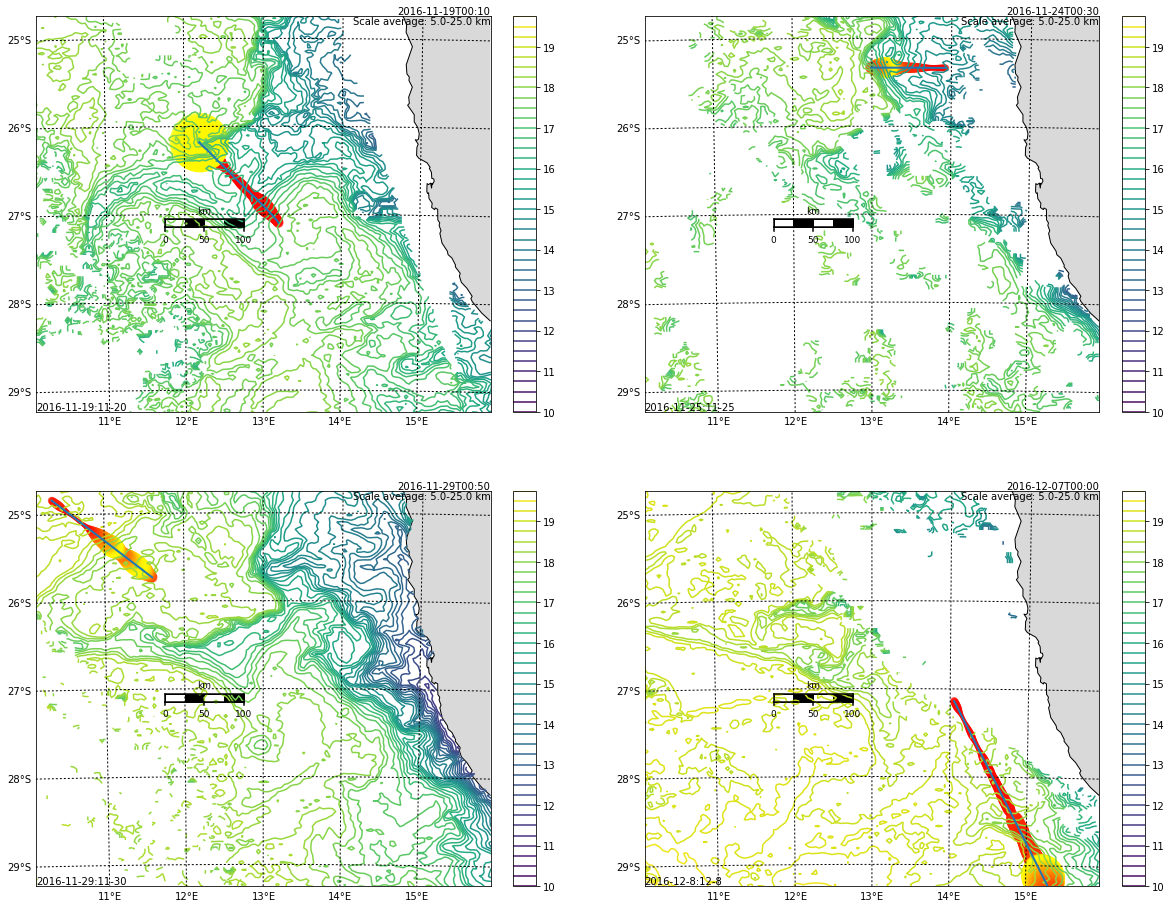

In [5]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*10.,nrows*8))
axs = axs.ravel()
bwidth, bheight = 5.75e5,5e5
sst_range=np.arange(10,20,0.25) # to match fg.plot_profile_view

# map scale av. wavelet power for KE 
si = 0
for key in scan_sadcp_transects_1km:
    if si > 3: continue
    if si==0: sst_map = sst_map_19
    elif si==1: sst_map = sst_map_24
    elif si==2: sst_map = sst_map_29
    elif si==3: sst_map = sst_map_1207
        
    m_second = fg.quick_map(scan_sadcp_transects_1km[key],'','',sst_map,13,-27, bwidth, bheight,
                           z_ind=-25,ax_in=axs[si],sst_range=sst_range, scale_avg=wave_out[key])
    m_second.drawmapscale(12.25, -27.1, 12.75, -27.1, 100, barstyle='fancy')
    si = si+1


#### Figure caption: Ship track of the first four transects in the lower left panel above. The color and circle size relate to the data in the bottom right panel above: Wavelet power for 5-25 km wavelengths (based on grey area in lower left plot), for depth-averaged (20-50 m) kinetic energy. The coloured contour lines show SST.The magenta lines on the transect show the frontal regions estimated from u-velocity gradient, in the top-righ panel above.

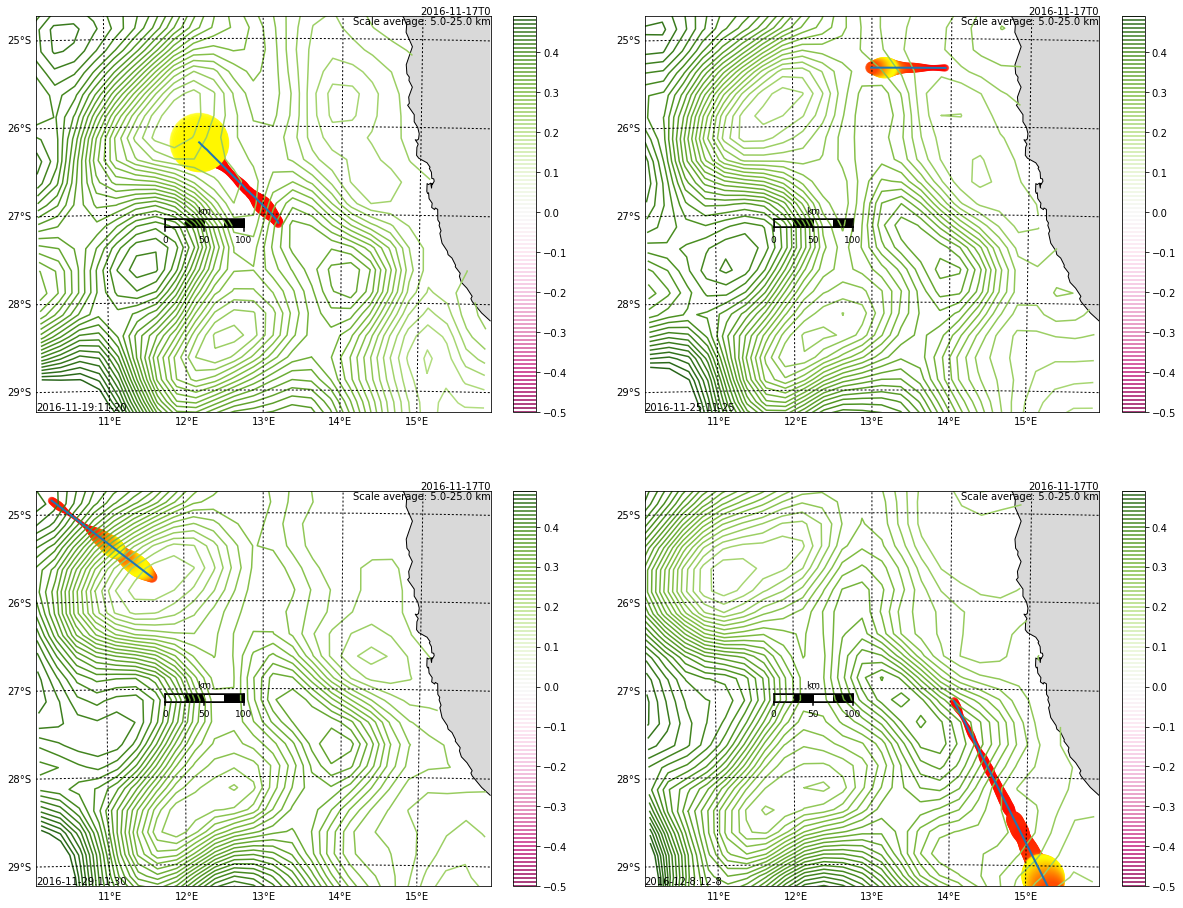

In [7]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*10.,nrows*8))
axs = axs.ravel()
bwidth, bheight = 5.75e5,5e5
sla_range=np.arange(-0.5,0.5,0.01) # 

gos__select = gos_map.sel(lon=slice(9.9,16.1),lat=slice(-30,-24)).load()

# map scale av. wavelet power for KE 
si = 0
for key in scan_sadcp_transects_1km:
    if si > 3: continue
    sla_map = gos__select.sel(time=scan_sadcp_transects_1km[key].time[-1].values,method='nearest')
        
    m_second = fg.quick_map(scan_sadcp_transects_1km[key],'','',sla_map,13,-27, bwidth, bheight,
                           z_ind=-25,ax_in=axs[si],sst_range=sla_range, scale_avg=wave_out[key],sla_flag=True)
    m_second.drawmapscale(12.25, -27.1, 12.75, -27.1, 100, barstyle='fancy')
    si = si+1


#### Figure caption: Ship track of the first four transects in the lower left panel above. The color and circle size relate to the data in the bottom right panel above: Wavelet power for 5-25 km wavelengths (based on grey area in lower left plot), for depth-averaged (20-50 m) kinetic energy. The coloured contour lines show sea level anomaly.The magenta lines on the transect show the frontal regions estimated from u-velocity gradient, in the top-righ panel above.